In [10]:
import json
import PySAM.Pvsamv1 as pv # import the PVWatts module from PySAM
import PySAM as pysam
print(pysam.__version__)
import PySAM.Battery as batt
import PySAM.BatteryTools as batt_tools
from PySAM.LoadTools import get_monthly_peaks
from PySAM.UtilityRateTools import URDBv8_to_ElectricityRates
import PySAM.Utilityrate5 as ur
import PySAM.Cashloan as cashloan
import PySAM.Grid as grid
import matplotlib.pyplot as plt

4.1.0


In [13]:
# create a new instance of the PVsamv1 and battery model
pv_batt_model = pv.new() #battery model runs from within pvsamv1
#batt_model = batt.default('StandaloneBatteryResidential')

# get the inputs from the JSON file
with open( 'untitled__1__pvsamv1.json', 'r') as f:
        pv_inputs = json.load( f )

with open( 'untitled__1__belpe.json', 'r') as f: 
        load_inputs = json.load(f)
# iterate through the input key-value pairs and set the module inputs
for k, v in pv_inputs.items():
    if k != 'number_inputs':
        pv_batt_model.value(k, v)
        

### Battery Sizing Helper Function

There are special PySAM functions that can assist with certain parts of the model. The first we will cover is the battery modeling helper functions. This model takes the battery model and desired battery bank power (kW), capacity (kWh), and battery cell voltage values (with other optional battery specifications) to size the battery inputs for your system

For more information, see the [Battery Tools documentation](https://nrel-pysam.readthedocs.io/en/main/helper-tools.html#battery-tools)


```
files.BatteryTools.battery_model_sizing(model, desired_power, desired_capacity, desired_voltage, size_by_ac_not_dc=None, module_specs: dict = None, tol=0.05)
```

In [21]:
# Battery helper function
# Battery with 6 kW, 12.5 kWh, 3.6 V cells
batt_tools.battery_model_sizing(pv_batt_model, 6, 12.5, 3.6)
pv_batt_model.SolarResource.solar_resource_file = "phoenix_az_33.450495_-111.983688_psmv3_60_tmy.csv"
pv_batt_model.execute()


(0.772599, 0.680559, 0.647978, 0.639773, 0.647299, 0.701176, 0.898463, 1.18119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.70023, 1.57341, 1.30665, 1.04025, 0.766092, 0.668008, 0.638176, 0.631643, 0.630719, 0.680559, 0.868189, 1.14577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.64945, 1.51581, 1.24953, 0.989607, 0.728895, 0.627736, 0.591047, 0.582502, 0.58515, 0.63975, 0.82732, 1.11033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.65319, 1.52026, 1.25115, 0.986633, 0.724535, 0.621831, 0.586269, 0.578634, 0.580296, 0.633488, 0.82341, 1.10683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.63312, 1.50165, 1.23477, 0.971207, 0.710398, 0.60885, 0.57237, 0.563399, 0.56498, 0.615861, 0.807437, 1.12391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.64328, 1.50973, 1.24017, 0.976862, 0.716173, 0.609864, 0.575339, 0.571726, 0.577625, 0.632291, 0.858222, 1.11282, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5

In [24]:
print(pv_batt_model.Outputs.batt_to_load)

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.60124, 1.85407, 1.8163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.56096, 1.81483, 1.76977, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045945226102704906, 0.0, 0.0, 0.0, 1.57649, 1.82813, 1.77641, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.54609, 1.80484, 1.75524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.57459, 1.82699, 1.7697, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [15]:
# Grid model
grid_model = grid.from_existing(pv_batt_model)
grid_model.Load.load = load_inputs['load']
print(grid_model.Load.load)
grid_model.execute()

(0.772599, 0.680559, 0.647978, 0.639773, 0.647299, 0.701176, 0.898463, 1.18119, 1.12899, 0.980107, 0.974842, 0.938832, 0.89839, 0.857997, 0.84954, 0.910038, 1.14956, 1.60124, 1.85407, 1.8163, 1.70023, 1.57341, 1.30665, 1.04025, 0.766092, 0.668008, 0.638176, 0.631643, 0.630719, 0.680559, 0.868189, 1.14577, 1.07639, 0.914602, 0.909658, 0.891823, 0.861353, 0.824849, 0.8209, 0.883623, 1.11748, 1.56096, 1.81483, 1.76977, 1.64945, 1.51581, 1.24953, 0.989607, 0.728895, 0.627736, 0.591047, 0.582502, 0.58515, 0.63975, 0.82732, 1.11033, 1.05038, 0.901878, 0.916423, 0.906216, 0.877961, 0.848578, 0.844502, 0.904255, 1.13373, 1.57649, 1.82813, 1.77641, 1.65319, 1.52026, 1.25115, 0.986633, 0.724535, 0.621831, 0.586269, 0.578634, 0.580296, 0.633488, 0.82341, 1.10683, 1.04885, 0.902712, 0.911645, 0.896458, 0.852513, 0.814475, 0.811163, 0.874906, 1.10935, 1.54609, 1.80484, 1.75524, 1.63312, 1.50165, 1.23477, 0.971207, 0.710398, 0.60885, 0.57237, 0.563399, 0.56498, 0.615861, 0.807437, 1.12391, 1.04518, 

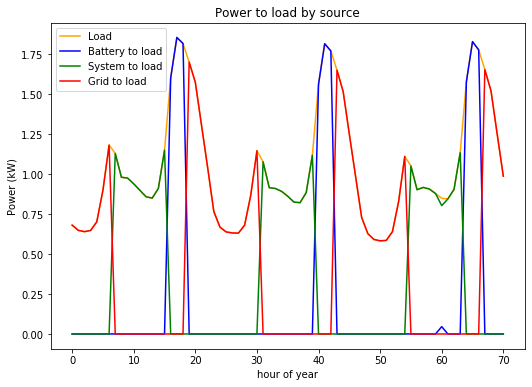

In [33]:
fig = plt.figure(figsize=(8.5, 6))
ax1 = fig.add_subplot(111)
ax1.set_title('Power to load by source')
ax1.set_ylabel('Power (kW)')
ax1.set_xlabel('hour of year')
dummy = ax1.plot(grid_model.Load.load[1:72], label="Load", color="orange")
dummy = ax1.plot(pv_batt_model.Outputs.batt_to_load[1:72], label="Battery to load", color="blue")
dummy = ax1.plot(pv_batt_model.Outputs.system_to_load[1:72], label="System to load", color="green")
dummy = ax1.plot(pv_batt_model.Outputs.grid_to_load[1:72], label="Grid to load", color="red")
label = True
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

### Load Helper Functions
The get_monthly_peaks function can be used to determine monthly load peaks to be used in utility rate calculations

In [11]:
#Load helper function
monthly_peaks = get_monthly_peaks(load_inputs['load'], 1)

In [18]:
ur_model = ur.from_existing(pv_batt_model)
ur_model.value("load", load_inputs['load'])
ur_model.value("gen", pv_batt_model.Outputs.gen)
ur_model.value("ur_yearzero_usage_peaks", monthly_peaks)
ur_model.value("degradation", [0])
ur_model.execute()
cl_model = cashloan.from_existing(ur_model)
cl_model.execute()

Exception: cashloan execution error.
	precheck input: variable 'federal_tax_rate' (Federal income tax rate) required but not assigned



### Utility Rate Helper Functions
There is also a function to turn utility rates downloaded from the Utility Rate Database v8 into the necessary inputs needed for the SAM utilityrate5 module. An example of this functionality is available [here](https://github.com/NREL/pysam/blob/main/Examples/UtilityRatesExample.py)

```
files.UtilityRateTools.URDBv8_to_ElectricityRates(urdb_response)
```

In [31]:
#Utility rate helper function
"""
This example script shows how to set up the utility rate module using a rate downloaded from the Utility Rate
This example requires an NREL developer key, which can be obtained from https://developer.nrel.gov/signup/
Additional financial models, inputs, and outputs can be found at:
* PV: https://nrel-pysam.readthedocs.io/en/master/modules/Utilityrate5.html
Most recently tested against PySAM 4.1.0
Requires: nrel-pysam, requests
@author: brtietz
"""
import json
import os
import certifi
import requests

import PySAM.Utilityrate5 as utility_rate
import PySAM.UtilityRateTools
import PySAM.LoadTools

# Get a key from https://api.openei.org:443
key = "LE8s7JQperWC8fTB7MIhpaO9INd1vOzM9oJZgmHO"

# Download rate from URDB and save as file. If rate has already been downloaded, use file
def get_urdb_rate_data(page, key):

    # Full API can be viewed at: https://openei.org/services/doc/rest/util_rates/?version=8
    urdb_url = 'https://api.openei.org/utility_rates?format=json&detail=full&version=8'
    get_url = urdb_url + '&api_key={api_key}&getpage={page_id}'.format(api_key=key, page_id=page)
    print(get_url)

    filename = "urdb_rate_{}.json".format(page)
    print(filename)

    if not os.path.isfile(filename):
        print(get_url)
        resp = requests.get(get_url, verify=certifi.where())
        data = resp.text
        # Cache rate as file
        if "error" not in data:
            with open(filename, 'w') as f:
                f.write(json.dumps(data, sort_keys=True, indent=2, separators=(',', ': ')))
    else:
        with open(filename, 'r') as f:
            data = json.load(f)

    return data


path = os.getcwd() + os.path.sep
page = "618940545457a35a1c4097ec"  # https://apps.openei.org/USURDB/rate/view/618940545457a35a1c4097ec (DG-R Primary (Above 500kW))
if "YOUR_API_KEY" in key:
    raise Exception("Please replace the `key` with your URDB API key.")
urdb_response = get_urdb_rate_data(page, key)
urdb_response_json = json.loads(urdb_response)
if 'error' in urdb_response_json.keys():
    raise Exception(urdb_response_json['error'])
rates = PySAM.UtilityRateTools.URDBv8_to_ElectricityRates(urdb_response_json["items"][0]) 

ur = utility_rate.new()
for k, v in rates.items():
    ur.value(k, v)

# Set up other defaults
analysis_period = 1 # Number of years to run the simulation
ur.value("analysis_period", analysis_period) 
ur.value("system_use_lifetime_output", 0) # Set to 1 if load and gen have length 8760 * analysis_period
ur.value("inflation_rate", 2.5) # Units of %
ur.value("degradation", [0] * analysis_period) # AC energy loss per year due to degradation during analysis period (%)

gen = [0] * 8760 # No renewable generation, run a technology compute module such as PVWatts8 to get this
load = [100] * 8760 # Constant 100 kW load - this could also be an array imported from CSV

ur.value("gen", gen) # Hourly kW
ur.value("load", load) # Hourly kW

# Not used for the rate above but leave this here for rates with billing demand
monthly_peaks = PySAM.LoadTools.get_monthly_peaks(load, 1)
ur.value("ur_yearzero_usage_peaks", monthly_peaks)

ur.execute() # Run the utility rate module

print("Total utility bill without system ($): ", ur.Outputs.elec_cost_without_system_year1) 
print("Average $/kW", ur.Outputs.elec_cost_without_system_year1 / sum(load))

https://api.openei.org/utility_rates?format=json&detail=full&version=8&api_key=LE8s7JQperWC8fTB7MIhpaO9INd1vOzM9oJZgmHO&getpage=618940545457a35a1c4097ec
urdb_rate_618940545457a35a1c4097ec.json
https://api.openei.org/utility_rates?format=json&detail=full&version=8&api_key=LE8s7JQperWC8fTB7MIhpaO9INd1vOzM9oJZgmHO&getpage=618940545457a35a1c4097ec
Total utility bill without system ($):  97108.30152000001
Average $/kW 0.11085422547945206


In [ ]:
# run the module
pv_model.execute()

# print results
print('Annual AC output for {capacity:,.2f} kW system is {output:,.0f} kWh.\n'.format(capacity = pv_model.value('system_capacity'), output = pv_model.Outputs.ac_annual) )

# run PVWatts for a series of nameplate capacities
capacities = [10, 100, 1000]
for c in capacities:
    # change the value of the system_capacity input
    pv_model.value('system_capacity',c)
    # run the module
    pv_model.execute()
    # print some results
    print('Annual AC output for {capacity:,.2f} kW system is {output:,.0f} kWh.'.format(capacity = pv_model.value('system_capacity'), output = pv_model.Outputs.ac_annual) )